In [9]:
import numpy as np
import os

def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return np.array([float(line.strip()) for line in lines])

def maximum_spacing_estimator(data):
    # Step 1: Sort the data
    sorted_data = np.sort(data)
    
    # Step 2: Calculate differences between consecutive order statistics
    differences = np.diff(sorted_data)
    #print(differences)
    
    # Step 3: Find the maximum spacing
    max_spacing = np.max(differences)
    print(max_spacing)
    
    # Step 4: Compute Maximum Spacing Estimator
    n = len(data)
    theta_mse = (n + 1) / n * max_spacing
    
    return theta_mse

# Generate three sets of sample data
np.random.seed(42)  # for reproducibility

# Getting the home directory
home_dir = os.path.expanduser("~")

# Constructing file paths
file_path_1 = os.path.join(home_dir, 'Downloads', 'sampleset_1_problemsheet4_ex1.txt')
file_path_2 = os.path.join(home_dir, 'Downloads', 'sampleset_2_problemsheet4_ex1.txt')
file_path_3 = os.path.join(home_dir, 'Downloads', 'sampleset_3_problemsheet4_ex1.txt')

# Read data from the three files
sample_data_1 = read_data(file_path_1)
sample_data_2 = read_data(file_path_2)
sample_data_3 = read_data(file_path_3)

# Calculate Maximum Spacing Estimators for each set of samples
theta_mse_1 = maximum_spacing_estimator(sample_data_1)
theta_mse_2 = maximum_spacing_estimator(sample_data_2)
theta_mse_3 = maximum_spacing_estimator(sample_data_3)

# Display the results
print(f"Set 1: Maximum Spacing Estimator for θ = {theta_mse_1:.4f}")
print(f"Set 2: Maximum Spacing Estimator for θ = {theta_mse_2:.4f}")
print(f"Set 3: Maximum Spacing Estimator for θ = {theta_mse_3:.4f}")


0.45489999999999986
0.2287999999999999
0.7923
Set 1: Maximum Spacing Estimator for θ = 0.4701
Set 2: Maximum Spacing Estimator for θ = 0.2334
Set 3: Maximum Spacing Estimator for θ = 0.8913


MSE Kalman Filter: 0.1448945320288361


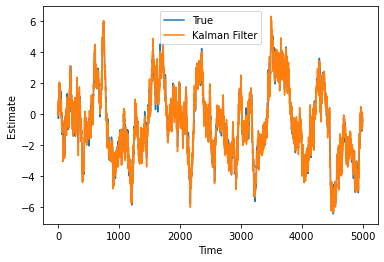

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
alpha = 0.99 
q = 0.5 # Process noise
r = 0.5 # Observation noise

# Getting the home directory
home_dir = os.path.expanduser("~")

# Constructing file paths
file_path_1 = os.path.join(home_dir, 'Downloads', 'data.txt')
file_path_2 = os.path.join(home_dir, 'Downloads', 'reference_signal.txt')

observations = read_data(file_path_1)
true_signal = read_data(file_path_2)[:5000]

T = len(observations)

# Initial condition
z0 = np.random.normal(0, 0.5)  

# Ensemble sizes
M_values = [5, 10, 25, 50]

# Kalman filter estimate
zk_kf = np.zeros(T)
Pk_kf = np.zeros(T)
zk_kf[0] = 0
Pk_kf[0] = 0.5
for t in range(1, T):
    zk_kf[t] = alpha*zk_kf[t-1] 
    Pk_kf[t] = alpha**2*Pk_kf[t-1] + q
    
    Kk = Pk_kf[t]/(Pk_kf[t]+r)
    zk_kf[t] = zk_kf[t] + Kk*(observations[t] - zk_kf[t])
    
    Pk_kf[t] = (1-Kk)*Pk_kf[t]

    
print("MSE Kalman Filter:", mse_kf)  

# Plot
plt.figure()
plt.plot(true_signal, label='True')
plt.plot(zk_kf, label='Kalman Filter')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Estimate')

plt.show()